In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk

**Data preparation**

In [ ]:
data = pd.read_csv('/content/Bangladeshi Female Celebrities - Sheet1 (1).csv',encoding='UTF-8')
data.head()

,Comments,Sentiments,Like,Haha,Angry,Love,Care,Sad,Wow
0,মাশাআল্লাহ,Positive,6,11,0,0,2,0,0
1,প্রিয় নেত্রী সাথে প্রিয় মানুষটা ♥️♥️,Positive,1,12,0,3,0,0,1
2,ভাবি আর দাদি😂,Negative,0,1,0,0,0,0,0
3,শুভ কামনা রইলো অপু আন্টির জন্য।,Positive,0,0,0,0,0,0,0
4,প্রোফাইল পিকটা চেন্জ করো \nআপু বিশ্বাস \nআর কত...,Negative,1,1,0,0,0,0,0


**Distribution**

Total Sentiment Counts:
Sentiments
Positive     3859
Negative     1268
Neutral       977
Name: count, dtype: int64


<ipython-input-5-0c932164d3d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


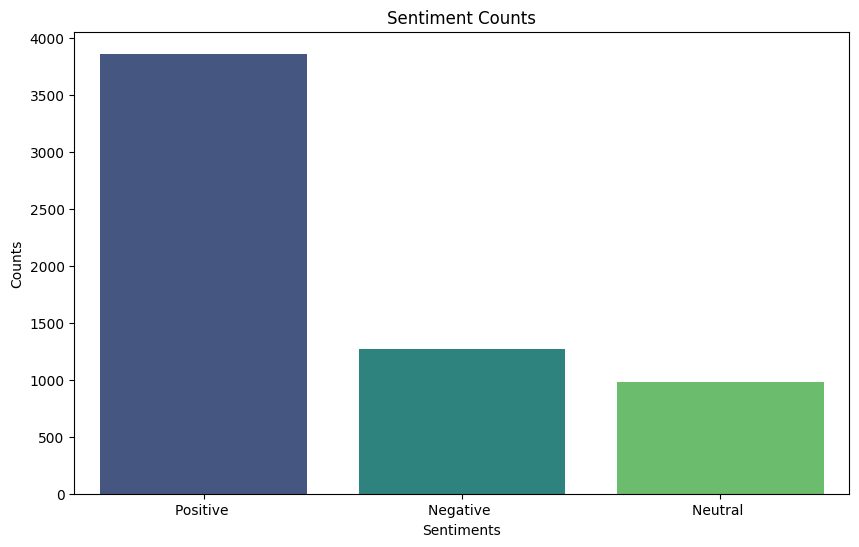

In [ ]:
# Count the total number of each sentiment
sentiment_counts = data['Sentiments'].value_counts()
# Display the sentiment counts
print("Total Sentiment Counts:")
print(sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Counts')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

**Ratio**

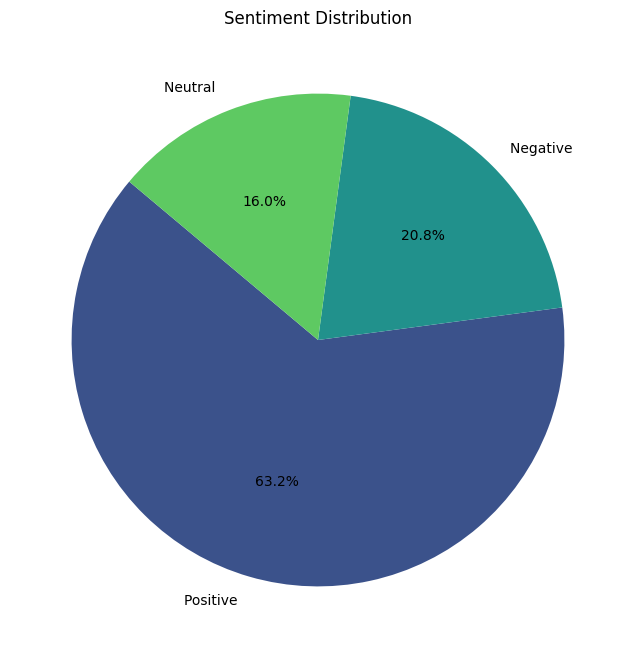

In [ ]:
# Generate a pie chart for the sentiment counts
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sentiment_counts)))
plt.title('Sentiment Distribution')
plt.show()

**Cleaning**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Data:
                                            Comments Sentiments  Like  Haha  \
0                                         মাশাআল্লাহ  Positive      6    11   
1             প্রিয় নেত্রী সাথে প্রিয় মানুষটা ♥️♥️  Positive      1    12   
2                                      ভাবি আর দাদি😂  Negative      0     1   
3                    শুভ কামনা রইলো অপু আন্টির জন্য।  Positive      0     0   
4  প্রোফাইল পিকটা চেন্জ করো \nআপু বিশ্বাস \nআর কত...  Negative      1     1   

   Angry  Love  Care  Sad  Wow  
0      0     0     2    0    0  
1      0     3     0    0    1  
2      0     0     0    0    0  
3      0     0     0    0    0  
4      0     0     0    0    0  

Missing values in each column:
Comments      1
Sentiments    0
Like          0
Haha          0
Angry         0
Love          0
Care          0
Sad           0
Wow           0
dtype: int64

Cleaned Data:
                                           Comments Sentiments  Like  Haha  \
0                             

<ipython-input-10-199d5c2dfa5f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


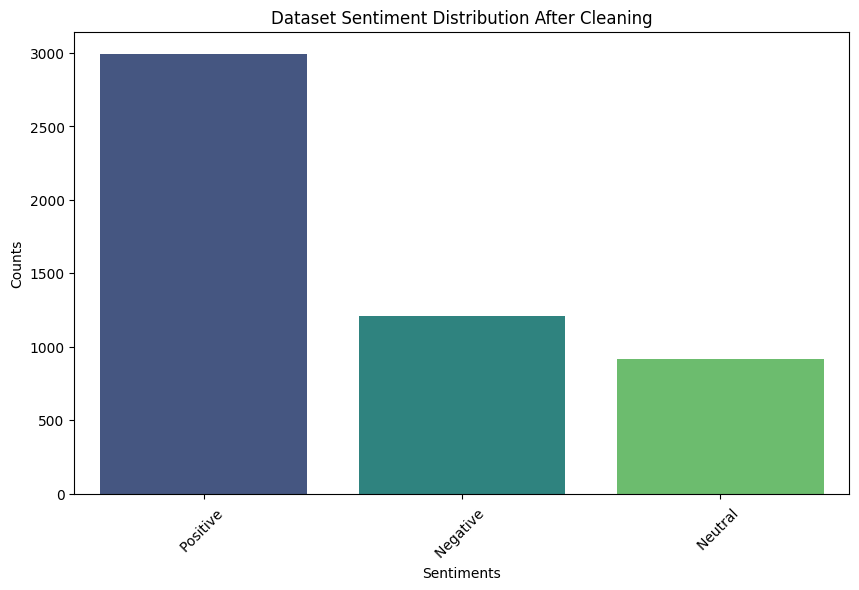

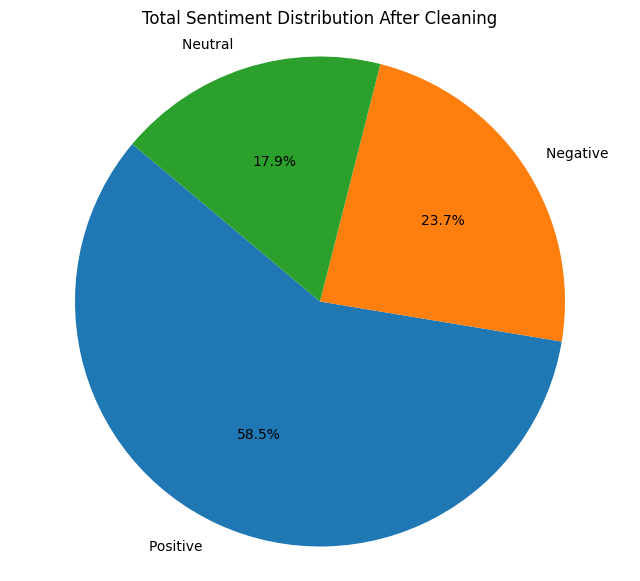

In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('bengali'))

# Load the dataset
data = pd.read_csv('/content/Bangladeshi Female Celebrities - Sheet1 (1).csv', encoding='UTF-8')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^ঀ-৿a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lower case
    text = text.lower()
    return text

# Apply the cleaning function to the 'Comments' column
data['Comments'] = data['Comments'].apply(clean_text)

# Remove stop words
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove duplicates if any
data.drop_duplicates(subset=['Comments'], inplace=True)

# Display the cleaned data
print("\nCleaned Data:")
print(data.head())

# Verify the changes
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Recalculate the sentiment counts after cleaning
sentiment_counts = data['Sentiments'].value_counts()

# Display the sentiment counts
print("\nTotal Sentiment Counts After Cleaning:")
print(sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Dataset Sentiment Distribution After Cleaning')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# Plot the pie chart with equal aspect ratio
plt.figure(figsize=(8, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sentiment Distribution After Cleaning')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

**Word Frequencey using Zip's Law**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           Word  Frequency  Rank
24       সুন্দর        813     1
75         ভালো        430     2
16          আপু        340     3
31        লাগছে        297     4
88      অসাধারণ        227     5
180        একটা        178     6
25         লাগে        165     7
10          অপু        155     8
0    মাশাআল্লাহ        155     9
110          টা        139    10
60        মানুষ        138    11
3          সাথে        133    12
120    ভালোবাসা        133    13
530         ছবি        127    14
184      তোমাকে        120    15
479     সুন্দরী        118    16
7           শুভ        118    17
78          হয়ে        115    18
42       আপনাকে        114    19
48           জয়        109    20


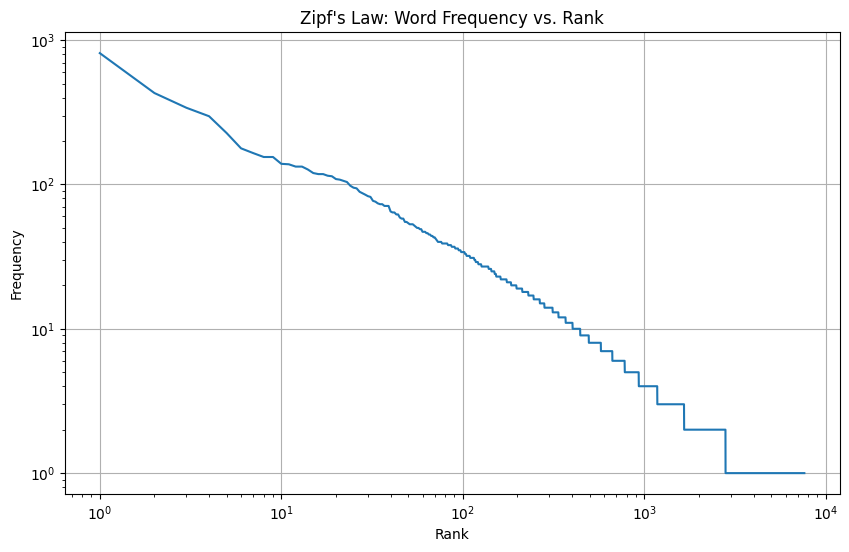

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Bengali stopwords
stop_words = set(stopwords.words('bengali'))

# Load the dataset
data = pd.read_csv('/content/Bangladeshi Female Celebrities - Sheet1 (1).csv', encoding='UTF-8')

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure the text is a string
    text = str(text)
    # Remove special characters and numbers
    text = re.sub(r'[^ঀ-৿a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

# Apply the function to the 'Comments' column and concatenate all tokens into a single list
all_words = []
data['Comments'].apply(lambda x: all_words.extend(clean_and_tokenize(x)))

# Calculate word frequencies
word_freq = Counter(all_words)

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Assign ranks
word_freq_df['Rank'] = np.arange(1, len(word_freq_df) + 1)

# Display the DataFrame
print(word_freq_df.head(20))

# Plot word frequency vs. rank (Zipf's Law plot)
plt.figure(figsize=(10, 6))
plt.plot(word_freq_df['Rank'], word_freq_df['Frequency'])
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf's Law: Word Frequency vs. Rank")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()